In [61]:
import pandas as pd
import numpy as np
# Min-Max Sclaing , Z-Scaling(Standardization)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# for Zscore outlier detection
# boxcox1p for data transformation
from scipy.stats import zscore
from scipy.special import boxcox1p

In [62]:
data = pd.read_csv('StudentsPerformance_modified.csv')

In [63]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [64]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [65]:
data.shape

(1000, 8)

In [66]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [67]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [68]:
data['math score'] = pd.to_numeric(data['math score'],errors='coerce')

In [69]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [70]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [71]:
# Fill missing values in categorical columns with mode
# categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
# data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
# Fill missing values in numeric columns with mean
numeric_cols = ['math score', 'reading score', 'writing score']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [72]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

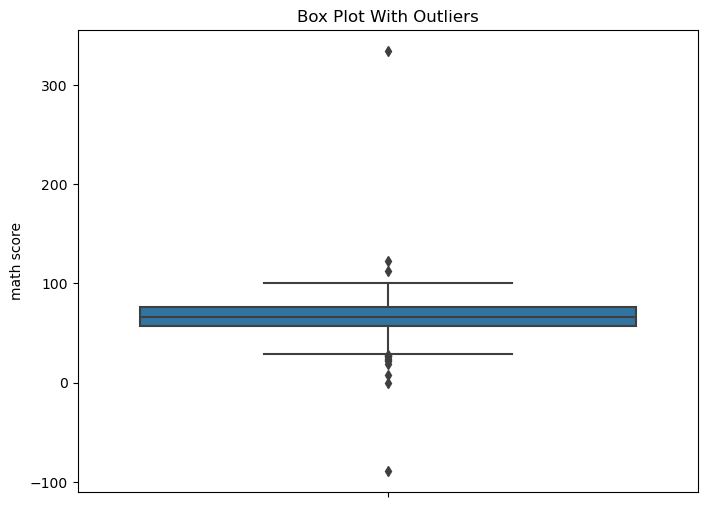

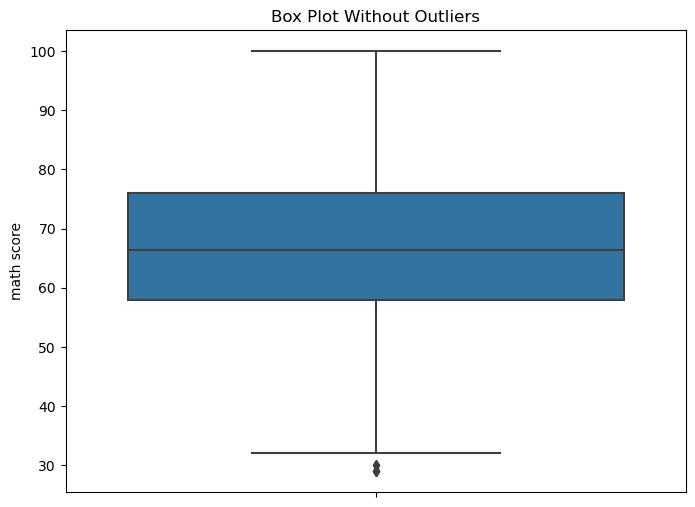

In [73]:
#outliers for math score using IQR
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['math score'])
plt.ylabel('math score')
plt.title('Box Plot With Outliers')
plt.show()

Q1 = data1['math score'].quantile(0.25)
Q3 = data1['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data1=data1[(data1['math score'] >= lower_limit) & (data1['math score'] <= upper_limit)]
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['math score'])
plt.ylabel('math score')
plt.title('Box Plot Without Outliers')
plt.show()

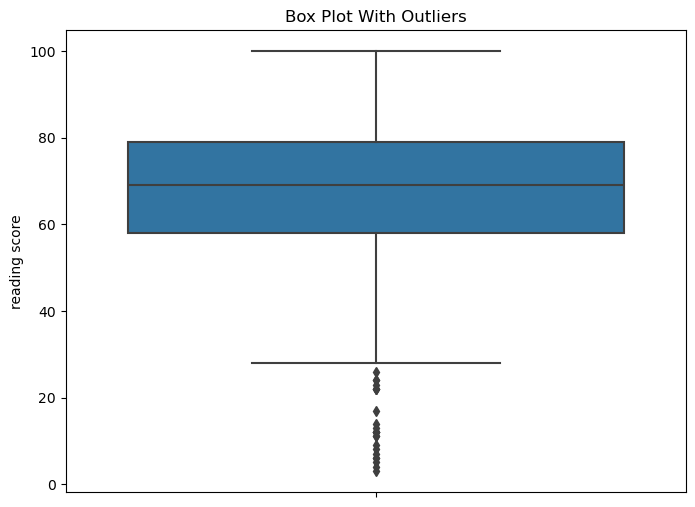

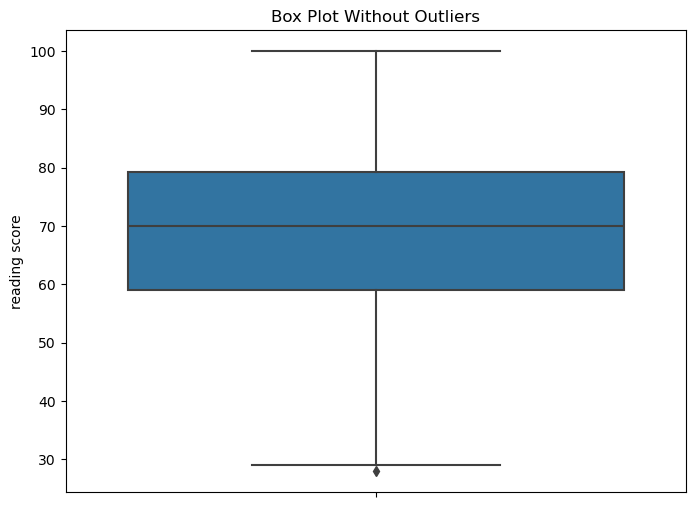

In [74]:
#outliers for reading score using IQR
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['reading score'])
plt.ylabel('reading score')
plt.title('Box Plot With Outliers')
plt.show()

Q1 = data1['reading score'].quantile(0.25)
Q3 = data1['reading score'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data1=data1[(data1['reading score'] >= lower_limit) & (data1['reading score'] <= upper_limit)]
plt.figure(figsize=(8,6))
sns.boxplot(y=data1['reading score'])
plt.ylabel('reading score')
plt.title('Box Plot Without Outliers')
plt.show()

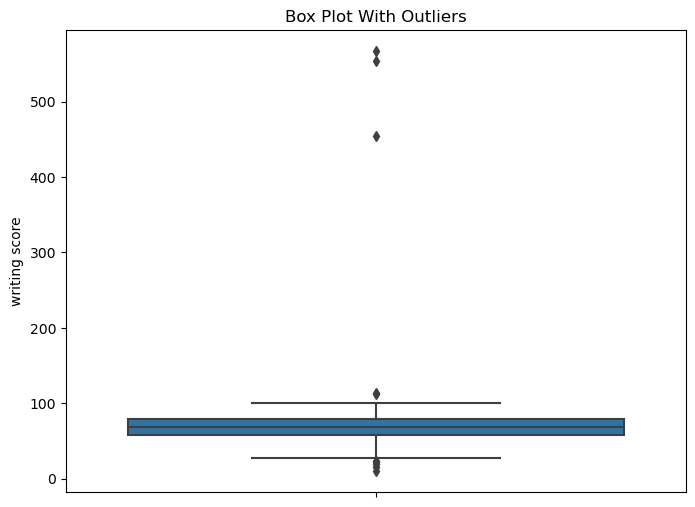

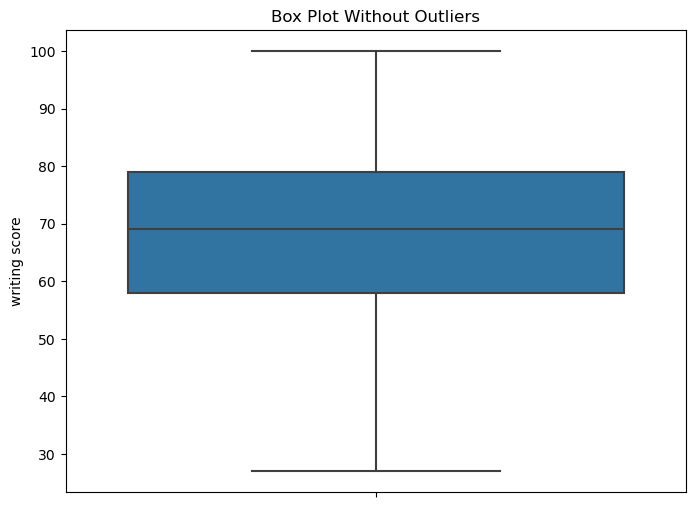

In [75]:
#outliers for writing score using IQR
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['writing score'])
plt.ylabel('writing score')
plt.title('Box Plot With Outliers')
plt.show()

Q1 = data1['writing score'].quantile(0.25)
Q3 = data1['writing score'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data1 = data1[(data1['writing score'] >= lower_limit) & (data1['writing score'] <= upper_limit)]
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['writing score'])
plt.ylabel('writing score')
plt.title('Box Plot Without Outliers')
plt.show()

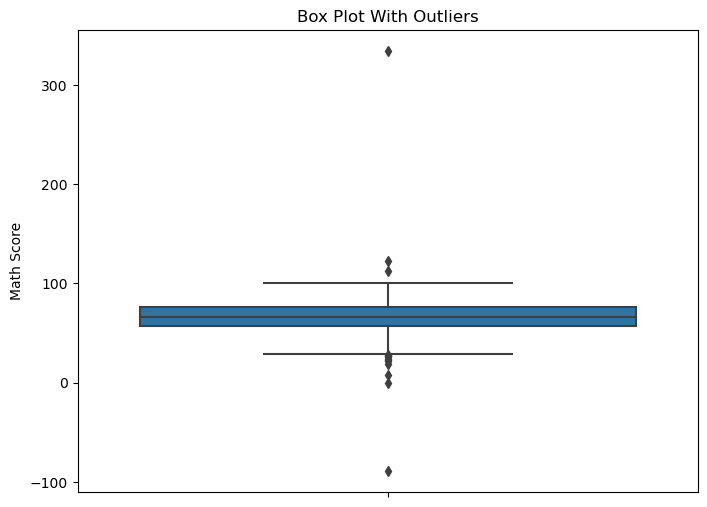

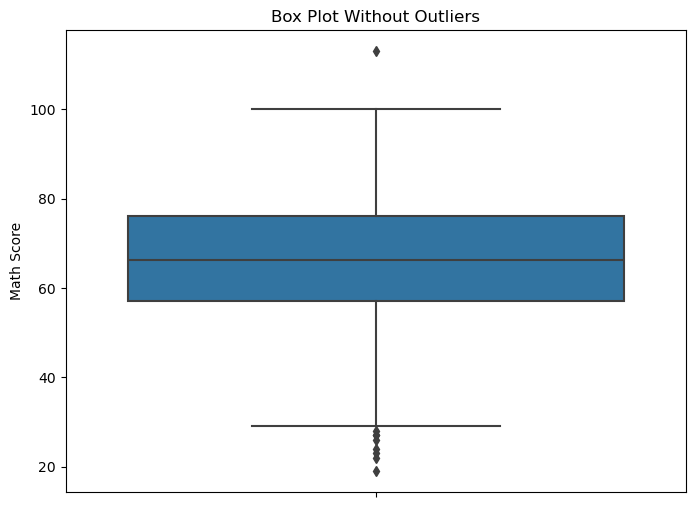

In [76]:
#outliers for math score using Z-score
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['math score'])
plt.ylabel('Math Score')
plt.title('Box Plot With Outliers')
plt.show()

z_scores = zscore(data1['math score'])
outlier_indices = np.where(np.abs(z_scores) > 3)[0]

data1 = data1.drop(outlier_indices)

plt.figure(figsize=(8,6))
sns.boxplot(y = data1['math score'])
plt.ylabel('Math Score')
plt.title('Box Plot Without Outliers')
plt.show()

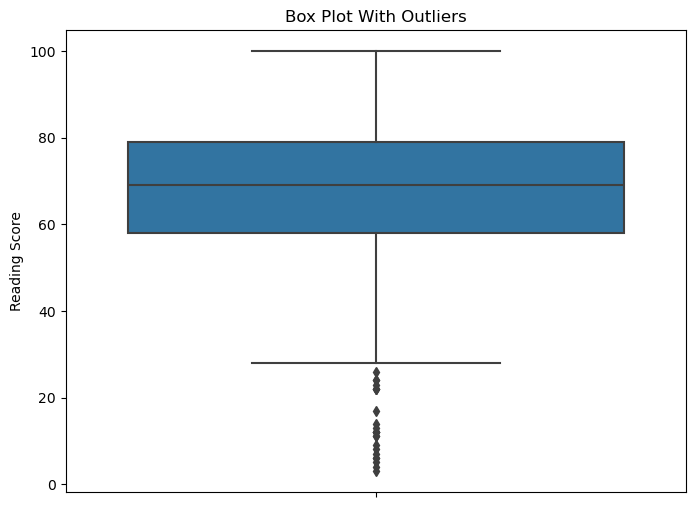

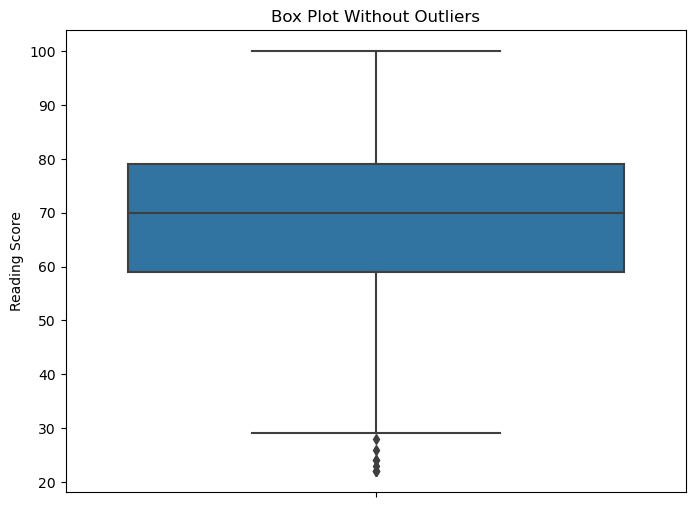

In [77]:
#outliers for reading score using Z-score
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['reading score'])
plt.ylabel('Reading Score')
plt.title('Box Plot With Outliers')
plt.show()

z_scores = zscore(data1['reading score'])
outlier_indices = np.where(np.abs(z_scores) > 3)[0]

data1 = data1.drop(outlier_indices)

plt.figure(figsize=(8,6))
sns.boxplot(y = data1['reading score'])
plt.ylabel('Reading Score')
plt.title('Box Plot Without Outliers')
plt.show()

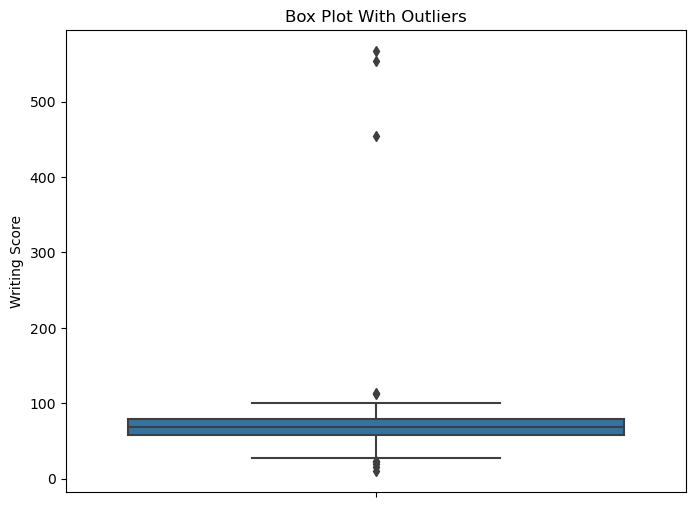

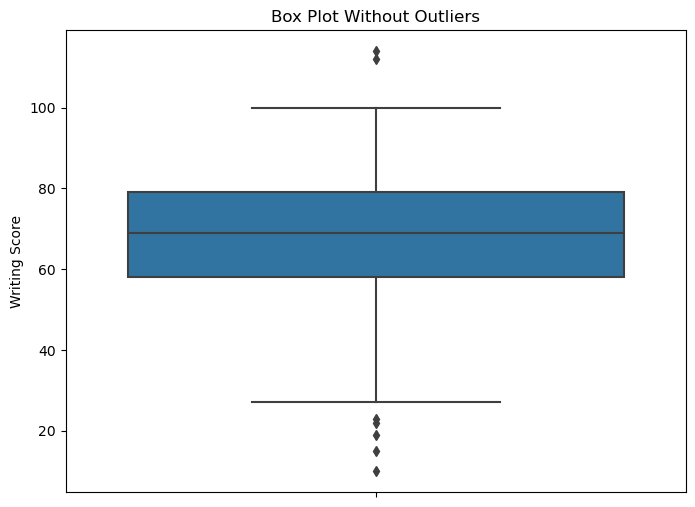

In [78]:
#outliers for writing score using Z-score
data1 = data
plt.figure(figsize=(8,6))
sns.boxplot(y = data1['writing score'])
plt.ylabel('Writing Score')
plt.title('Box Plot With Outliers')
plt.show()

z_scores = zscore(data1['writing score'])
outlier_indices = np.where(np.abs(z_scores) > 3)[0]

data1 = data1.drop(outlier_indices)

plt.figure(figsize=(8,6))
sns.boxplot(y = data1['writing score'])
plt.ylabel('Writing Score')
plt.title('Box Plot Without Outliers')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:11

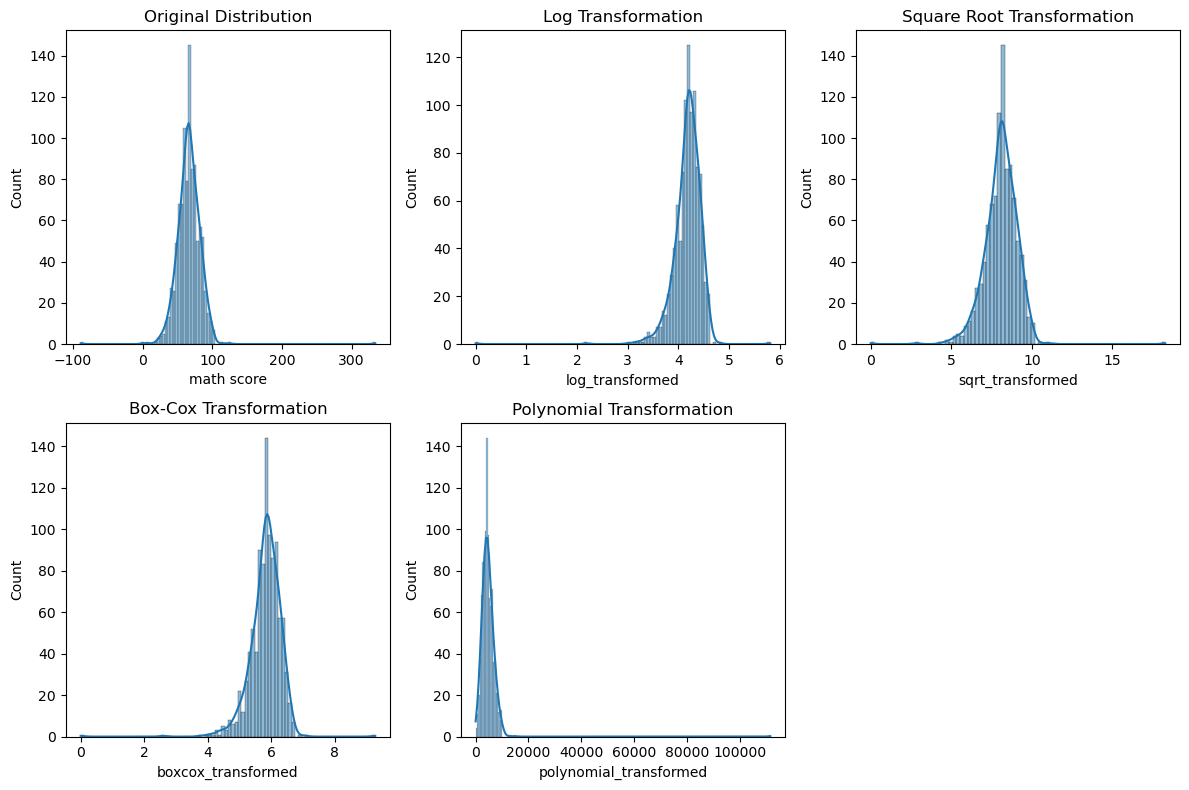

In [79]:
# data transformation 
# log transformation , square root transformation , Box-Cox transformation , polynomial transformation (square)
# kde kernel density estimation
variable_to_transform = 'math score'
data['log_transformed'] = np.log1p(data[variable_to_transform])
data['sqrt_transformed'] = np.sqrt(data[variable_to_transform])
data['boxcox_transformed'] = boxcox1p(data[variable_to_transform], 0.15)
data['polynomial_transformed'] = data[variable_to_transform] ** 2

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(data[variable_to_transform], kde=True)
plt.title('Original Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['log_transformed'], kde=True)
plt.title('Log Transformation')

plt.subplot(2, 3, 3)
sns.histplot(data['sqrt_transformed'], kde=True)
plt.title('Square Root Transformation')

plt.subplot(2, 3, 4)
sns.histplot(data['boxcox_transformed'], kde=True)
plt.title('Box-Cox Transformation')

plt.subplot(2, 3, 5)
sns.histplot(data['polynomial_transformed'], kde=True)
plt.title('Polynomial Transformation')

plt.tight_layout()
plt.show()

In [80]:
#IF Scaling, Normalisation is asked , refer data wrangling 1
#THE END